In [10]:
import pandas as pd
import os,sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

## CRDM
### Comparison of parameter estimation using: Bayesian Hieararchicael model (BHM) and Maximum Likelihood Estimation (MLE)
The comparison here is for the two parameter estimation methods MLE and BHM for CDD from the IDM Mturk datasaet

In [11]:
def compute_correlations(x, y):
    # Compute Pearson correlation
    pearson_r, pearson_p = pearsonr(x, y)
    pearson_r2 = pearson_r ** 2
    # Compute Spearman correlation
    spearman_r, spearman_p = spearmanr(x, y)
    spearman_r2 = spearman_r ** 2
    return {'Pearson': {'r': pearson_r, 'r^2': pearson_r2, 'p-value': pearson_p},
            'Spearman': {'r': spearman_r, 'r^2': spearman_r2, 'p-value': spearman_p}}

In [12]:
utility_dir = '/Volumes/UCDN/datasets/IDM/utility/'
split_fn = os.path.join(utility_dir,'split_CRDM_analysis.csv')
df_mle = pd.read_csv(split_fn,index_col=0)
df_mle[['subject','alpha','beta','gamma','R2']]

,subject,alpha,beta,gamma,R2
0,23_IDM_0001,1.370612,0.739362,0.586054,0.808258
1,23_IDM_0002,0.125000,4.167000,8.000000,0.931211
2,23_IDM_0003,0.718155,0.320549,1.863909,0.677925
3,23_IDM_0004,0.445282,-0.497399,2.533340,0.518582
4,23_IDM_0005,0.569743,0.523232,1.729322,0.454972
...,...,...,...,...,...
144,23_IDM_0145,0.464272,0.469203,4.887778,0.725689
145,23_IDM_0146,0.689578,0.017884,1.575340,0.600220
146,23_IDM_0147,0.253156,4.167000,8.000000,0.960286
147,23_IDM_0148,0.635245,0.841875,0.929289,0.299373


In [13]:
def plot_MLE_correlation(df,idx=1,var2='R2',var1='kappa'):
    plt.figure(idx)
    x = np.log(df[var1])
    y = df[var2]
    plt.scatter(x, y)
    plt.xlabel('log {} (MLE)'.format(var1))
    plt.ylabel('{} (MLE)'.format(var2))
    corr = compute_correlations(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x+b,"r-")
    plt.title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")

In [14]:
# var_names=['alpha','beta','gamma']
# for idx,var in enumerate(var_names):
#     plot_MLE_correlation(df_mle,idx=idx,var2='R2',var1=var)

In [15]:
def extract_mean(fn,var_names=['kappa','gamma'],nb_subjects=149):
    df = pd.read_csv(fn,index_col=0)
    df_bhm = pd.DataFrame([],columns=var_names)
    for var in var_names:
        ind_list = ['{}[{}]'.format(var,sub_id) for sub_id in range(nb_subjects)]
        df_bhm[var] = df.loc[df.index.isin(ind_list)]['mean'].reset_index(drop=True)
    return df_bhm

In [16]:
def plot_correlation(df_mle,df_bhm,idx=1,var='kappa'):
    plt.figure(idx)
    if 'beta' in var:
        x,y = df_mle[var],df_bhm[var]
        xlabel,ylabel = '{} (MLE)'.format(var),'{} (BHM)'.format(var)
    else:
        x,y = np.log(df_mle[var]),np.log(df_bhm[var])
        xlabel,ylabel = 'log {} (MLE)'.format(var),'log {} (BHM)'.format(var)
    # y = df_bhm[var]
    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    corr = compute_correlations(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x+b,"r-")
    min_val = np.min([np.min(x),np.min(y)])
    max_val = np.max([np.max(x),np.max(y)])
    plt.plot([min_val, max_val],[min_val, max_val],'k-')
    plt.title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")

In [17]:
experiment='v002'
bhm_dir = '/Volumes/UCDN/datasets/IDM/BH/crdm'
bhm_fn = os.path.join(bhm_dir,'BHM_model_summary_{}.csv'.format(experiment))
df_bhm = extract_mean(bhm_fn,var_names=['alpha','beta','gamma'],nb_subjects=df_mle.shape[0])
df_bhm


,alpha,beta,gamma
0,1.237686,0.471843,0.821285
1,0.146952,0.750425,5.510027
2,0.708024,0.264247,1.875872
3,0.464410,-0.367778,2.322045
4,0.557261,0.469435,1.722073
...,...,...,...
144,0.473691,0.508100,3.718645
145,0.683120,0.005955,1.599327
146,0.263944,0.887045,5.646859
147,0.593063,0.708244,1.004810


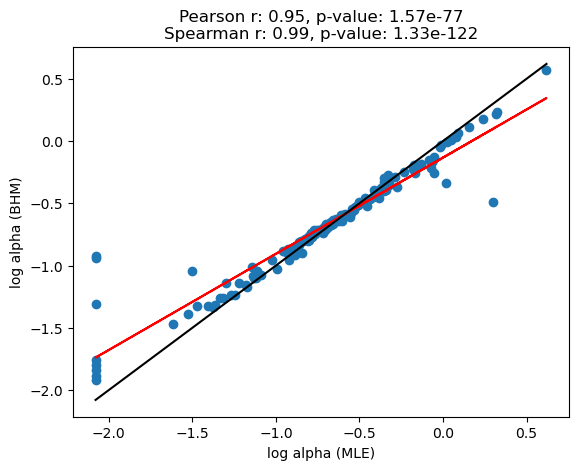

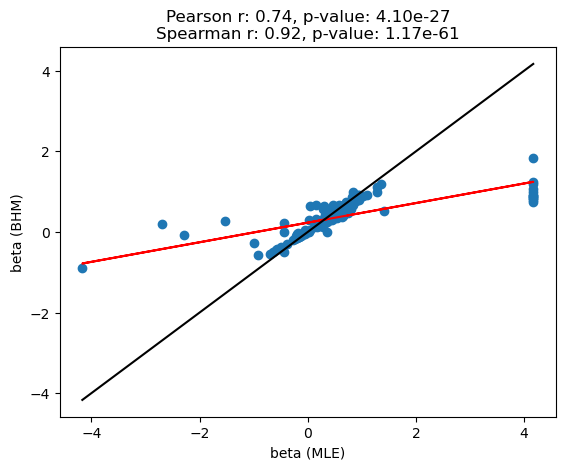

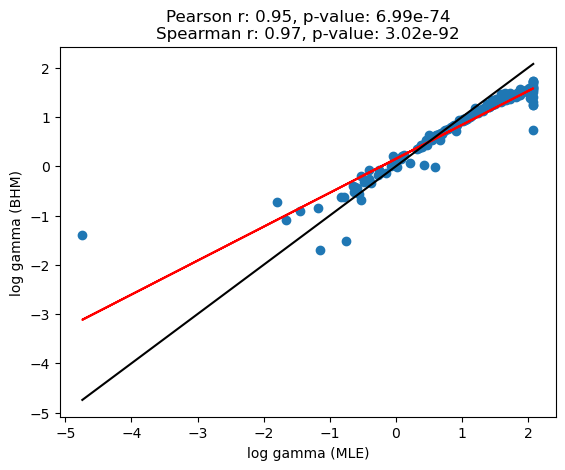

In [18]:
# experiment = 'v002' 
var_names=['alpha','beta','gamma']
for idx,var in enumerate(var_names):
    plot_correlation(df_mle,df_bhm,idx=idx,var=var)